In [39]:
!pip install matplotlib
!pip install psycopg2

In [40]:
import matplotlib.pyplot as plt
import psycopg2
try:
  connection = psycopg2.connect(user = 'itmo408539_2024',
                                password = 'itmo408539',
                                host = '146.185.211.205',
                                port = '5432',
                                database = 'dbstud')
  cursor = connection.cursor()
  print("Соединение установлено!")

except:
  print("Ошибка соединения!")

Соединение установлено!


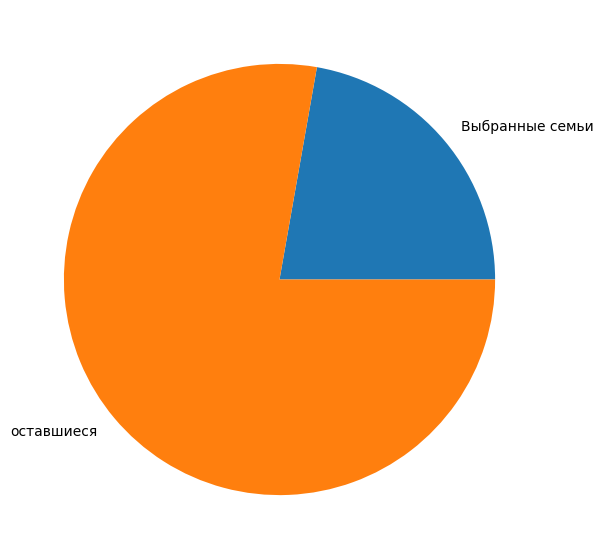

In [41]:
# Выполняем запрос на определение количества проданных товаров каждой аптекой
cursor.execute('''
    SELECT 
        (SELECT quantity_familes FROM breed WHERE breed_name = 'Дальневосточная') + 
        (SELECT quantity_familes FROM breed WHERE breed_name = 'Бакфаст') AS sum_value;
''')

# Получаем результаты запроса
results = cursor.fetchall()
A = results[0][0]


# Визуализация
breeds = ['Выбранные семьи', 'оставшиеся']
 
data = [A, 45 - A]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=breeds)
plt.show()


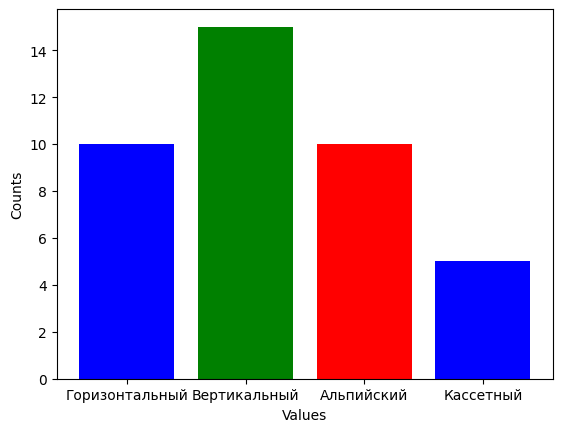

In [42]:
# Выполняем запрос для подсчета количества каждого из типа ульев
query = """
SELECT 
    SUM(CASE WHEN hive_type = 'Горизонтальный' THEN 1 ELSE 0 END) AS count_A,
    SUM(CASE WHEN hive_type = 'Вертикальный' THEN 1 ELSE 0 END) AS count_B,
    SUM(CASE WHEN hive_type = 'Альпийский' THEN 1 ELSE 0 END) AS count_C,
    SUM(CASE WHEN hive_type = 'Кассетный' THEN 1 ELSE 0 END) AS count_D
FROM hive;
"""

# Выполнение запроса
cursor.execute(query)
result = cursor.fetchone()

# Вывод результата
count_A, count_B, count_C, count_D = result
counts = [count_A, count_B, count_C, count_D]
labels = ['Горизонтальный', 'Вертикальный', 'Альпийский', 'Кассетный']

# Построение столбчатой диаграммы с количеством каждого типа улья
plt.bar(labels, counts, color=['blue', 'green', 'red'])
plt.xlabel('Values')
plt.ylabel('Counts')
plt.show()

# Закрытие соединения с базой данных
cursor.close()
connection.close()